# Internet User Prediction

In [4]:
import pandas as pd

In [13]:
data = pd.read_csv('Final.csv')
data.isnull().sum()

Unnamed: 0                0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [14]:
data.head(10)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0
5,5,Afghanistan,AFG,1985,0.0,0.0,0,0.0
6,6,Afghanistan,AFG,1986,0.0,0.0,0,0.0
7,7,Afghanistan,AFG,1987,0.0,0.0,0,0.0
8,8,Afghanistan,AFG,1988,0.0,0.0,0,0.0
9,9,Afghanistan,AFG,1989,0.0,0.0,0,0.0


In [15]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} unique values")

Unnamed: 0: 8867 unique values
Entity: 229 unique values
Code: 216 unique values
Year: 41 unique values
Cellular Subscription: 6344 unique values
Internet Users(%): 4702 unique values
No. of Internet Users: 5058 unique values
Broadband Subscription: 3858 unique values


In [16]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 8)


In [17]:
data = data.drop('Unnamed: 0', axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  8867 non-null   object 
 1   Code                    8867 non-null   object 
 2   Year                    8867 non-null   int64  
 3   Cellular Subscription   8867 non-null   float64
 4   Internet Users(%)       8867 non-null   float64
 5   No. of Internet Users   8867 non-null   int64  
 6   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 485.0+ KB


In [19]:
unique_value = data['Code'].unique()
print(unique_value)

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV'
 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB'
 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'Region' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB'
 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB'
 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO'
 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS'
 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE'
 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA'
 'PRK' 'MKD' 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER'
 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 

In [20]:
df = data.copy() #a copy for new dataset


world_df = df[df['Code'].str.contains('OWID_WRL')].copy() #world and region separation
region_df = df[df['Code'].str.contains('Region')].copy()

df['Code'] = df['Code'].replace('OWID_KOS', 'KOS')
df = df[~df['Code'].isin(['OWID_WRL', 'Region'])].copy()

In [21]:
unique_value = df['Code'].unique()
print(unique_value)

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV'
 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB'
 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ'
 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO'
 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI'
 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM'
 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO'
 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT'
 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR'
 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD' 'MNP'
 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'VCT' 'W

In [22]:
unique_value = region_df['Entity'].unique()
print(unique_value)

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'High income' 'Latin America and Caribbean' 'Low and middle income'
 'Low income' 'Lower middle income' 'Middle East and North Africa'
 'Middle income' 'North America' 'South Asia' 'Sub-Saharan Africa'
 'Upper middle income']


In [23]:
# Specify the values we want to separate from the 'Entity' column
desired_values = ['High income', 'Low and middle income', 'Low income', 'Lower middle income', 'Middle income', 'Upper middle income']
#new dataframe for the desired values
income_df = region_df[region_df['Entity'].isin(desired_values)].copy()
# Drop the rows containing the desired values from the 'Entity' column
region_df = region_df[~region_df['Entity'].isin(desired_values)].copy()

In [24]:
# Print the unique values in the "Entity" column
unique_value = income_df['Entity'].unique()
print(unique_value)

['High income' 'Low and middle income' 'Low income' 'Lower middle income'
 'Middle income' 'Upper middle income']


In [25]:
unique_value = region_df['Entity'].unique()
print(unique_value)

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'Latin America and Caribbean' 'Middle East and North Africa'
 'North America' 'South Asia' 'Sub-Saharan Africa']


In [26]:
df_2020 = df[df['Year'] == 2020]

In [ ]:
import matplotlib.pyplot as plt #type: ignore
import plotly.express as px     #type: ignore
fig = px.choropleth(df_2020, 
                    locations='Code', 
                    color='No. of Internet Users', 
                    hover_name='Entity', 
                    color_continuous_scale='RdBu',
                    range_color=(0, 200000000),  # Set the color range from 0 to 200 million
                    )

fig.update_layout(
    title_text='Number of Internet Users in 2020',
    coloraxis_colorbar=dict(
        title='No. of Internet Users',
        dtick=20000000,  # Adjust the colorbar tick interval as per your preference
        tickformat='.0s',  # Format the tick labels in a readable way
    )
)

fig.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose #type: ignore
from statsmodels.tsa.statespace.sarimax import SARIMAX  #type: ignore
from pandas.tseries.offsets import DateOffset           #type: ignore

In [30]:
#Create a new dataframe
df = data.copy()

#Separate World and Region from the data set
world_df = df[df['Code'].str.contains('OWID_WRL')].copy()

In [31]:
# Remove rows with values from 1980 to 1989 in the "Year" column
world_df = world_df[~world_df['Year'].between(1980, 1989)]

# Reset the index of the DataFrame
world_df.reset_index(drop=True, inplace=True)

In [32]:
# Year to datetime
world_df['Year'] = pd.to_datetime(world_df['Year'], format='%Y')
print(world_df.dtypes)

Entity                            object
Code                              object
Year                      datetime64[ns]
Cellular Subscription            float64
Internet Users(%)                float64
No. of Internet Users              int64
Broadband Subscription           float64
dtype: object


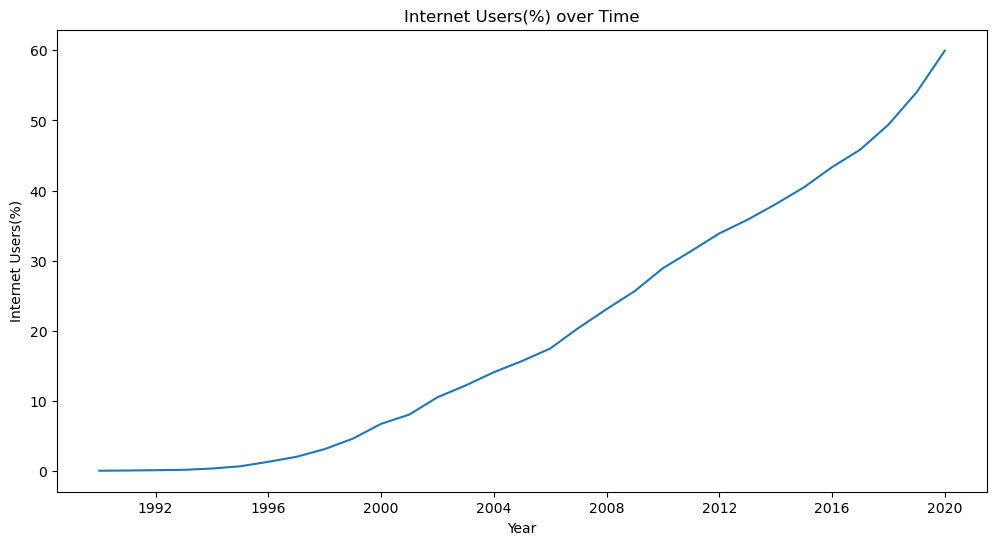

In [33]:
import seaborn as sns #type: ignore


plt.figure(figsize=(12, 6))
sns.lineplot(data=world_df, x='Year', y='Internet Users(%)')
plt.title('Internet Users(%) over Time')
plt.xlabel('Year')
plt.ylabel('Internet Users(%)')
plt.show()

In [34]:
# Set the Year as the index
world_df.set_index('Year', inplace=True)

# Convert the index to a PeriodIndex with yearly frequency
world_df.index = pd.PeriodIndex(world_df.index, freq='A-DEC')

# Convert the index to datetime format for plotting
world_df.index = world_df.index.to_timestamp()

/tmp/ipykernel_32836/3679256780.py:5: FutureWarning:

'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.



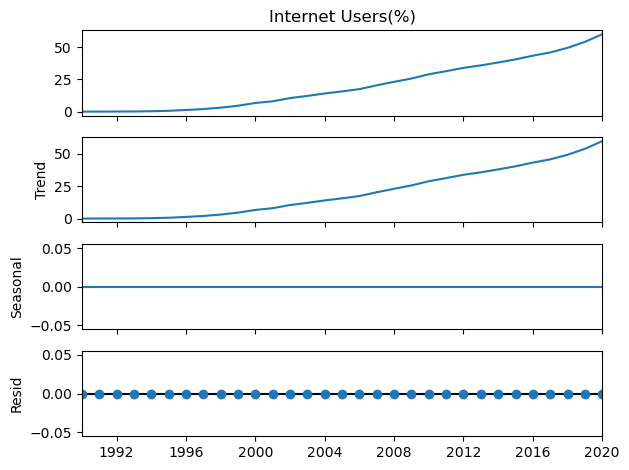

In [35]:
# Decompose the time series
decomposition = seasonal_decompose(world_df['Internet Users(%)'], period=1)

# Plot the trend, seasonal, and residual components
decomposition.plot()
plt.show()

# Prediction After Years means After 2020 Internet User Prediction

/home/faraz-ul-hassan/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/tmp/ipykernel_32836/3573550115.py:8: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



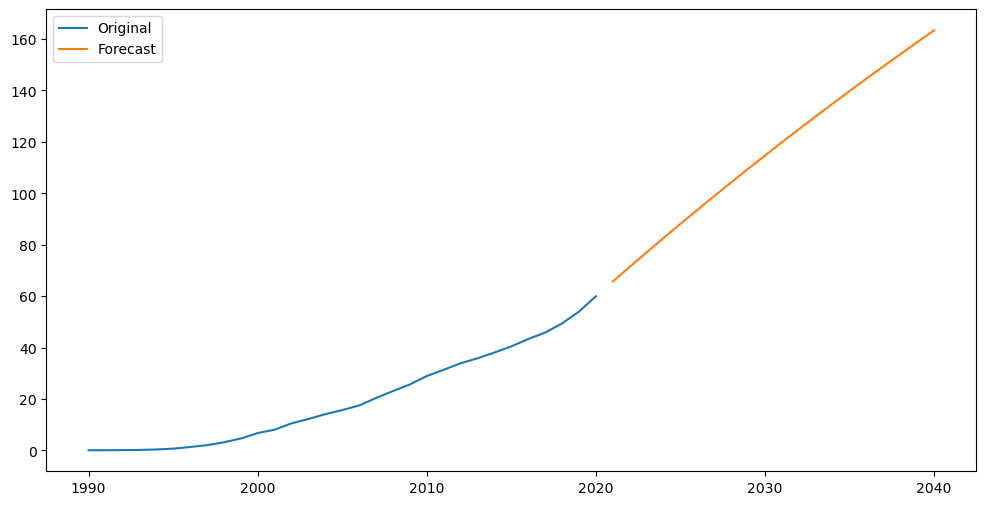

In [36]:
# Fit a SARIMAX model
model = SARIMAX(world_df['Internet Users(%)'], order=(1, 1, 1))
results = model.fit(disp=-1)

# Generate forecast for the next 5 years
future_years = [world_df.index[-1] + DateOffset(years=x) for x in range(1,21)]
future_years_df = pd.DataFrame(index=future_years, columns=world_df.columns)
future_df = pd.concat([world_df, future_years_df])

# Predict for the next 5 years
future_df['forecast'] = results.predict(start = len(world_df), end = len(world_df) + 19, dynamic= True)

# Plot the original data, the fitted values, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_df['Internet Users(%)'], label='Original')
plt.plot(future_df['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

# Prediction Between the Years

/home/faraz-ul-hassan/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Mean Absolute Error (MAE): 3.5744643805752645
Mean Squared Error (MSE): 25.057225048634027
Root Mean Squared Error (RMSE): 5.005719233899763
R^2 Score: 0.5116307122514523


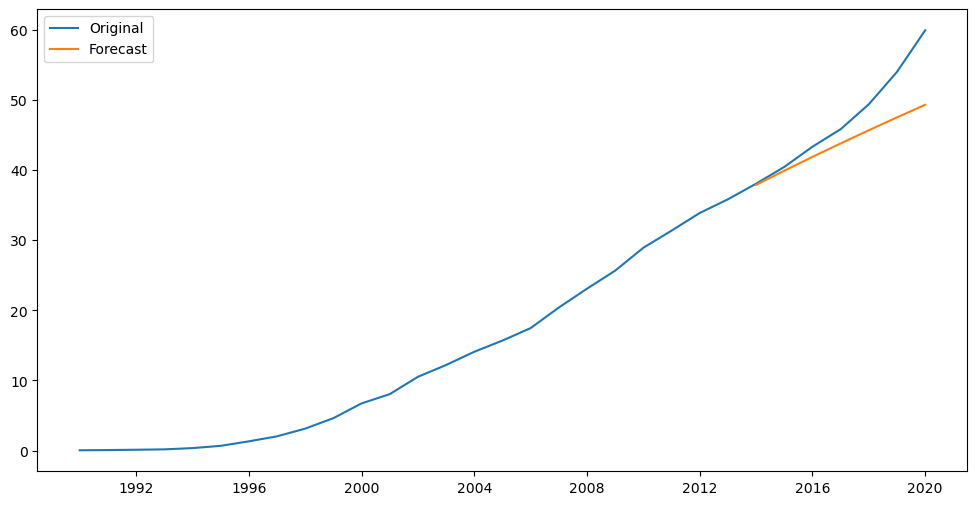

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #type: ignore
import numpy as np #type: ignore

# Split data into training and testing sets
train_size = int(len(world_df) * 0.8)  # Use 80% of data for training
train_data, test_data = world_df.iloc[:train_size], world_df.iloc[train_size:]

# Fit SARIMAX model on training data
model = SARIMAX(train_data['Internet Users(%)'], order=(1, 1, 1))
results = model.fit(disp=-1)

# Forecast on test data (predicting future values)
forecast = results.predict(start=len(train_data), end=len(world_df)-1, dynamic=True)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data['Internet Users(%)'], forecast)
mse = mean_squared_error(test_data['Internet Users(%)'], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['Internet Users(%)'], forecast)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(world_df.index, world_df['Internet Users(%)'], label='Original')
plt.plot(test_data.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.show()